# هذا الملف صنف بيانات الغير مرئية بأستخدام 7 طرق وتم انشاء ملف لكل طريقة تجميع لتنبؤ بسرطان الثدي في ملف unseen data
# بواسطة خوارزمية الكارت  

**Breast Cancer Wisconsin (Diagonistic) Data Set Cluster Analysis Using Different Techniques...**
> Two major clusters expected === Malignant(M) and Benign(B) ===

> **Techniques Implemented**

>> KMeans Clustering

>> Hierarchical Agglomerative Clustering  

>> DBSCAN (Density-Based Clustering of Applications with Noise) 

>> MeanShift Clustering

>> Spectral Clustering

>> Gaussian Mixture with Expectation Maximization (EM) Clustering

>> Gaussian Mixture with Variation Inference (VI) Clustering a.k.a Dirichlet Process


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# Read the data file
data = pd.read_csv('X_train.csv')
data.head()

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,0,1,60,Tragan,100,23,0.8,3.4,10.0,20,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,1,53,Sabha,190,27,0.6,4.2,9.3,11,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,2,1,50,Sabha,150,15,1.1,3.5,8.5,13,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.columns.tolist()
for column in cols:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [4]:
data=data.drop(["Unnamed: 0"],axis=1)
data


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [5]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Check for missing values
#data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sex        2435 non-null   int64  
 1   Age        2435 non-null   int64  
 2   Adress     2435 non-null   int32  
 3   FBS        2435 non-null   int64  
 4   Urea       2435 non-null   int64  
 5   Creatinin  2435 non-null   float64
 6   ALB        2435 non-null   float64
 7   T_Ca       2435 non-null   float64
 8   GPT        2435 non-null   int64  
 9   GOT        2435 non-null   int64  
 10  ALP        2435 non-null   int64  
 11  CA15       2435 non-null   float64
 12  CEA        2435 non-null   float64
 13  WBC        2435 non-null   float64
 14  RBC        2435 non-null   float64
 15  HGB        2435 non-null   float64
 16  PLT        2435 non-null   int64  
 17  ESR        2435 non-null   int64  
 18  LDH        2435 non-null   int64  
 19  Na         2435 non-null   float64
 20  K       

In [7]:
# Preprocessing data set

X = StandardScaler().fit_transform(data)

## ايجاد عدد CLUSTRING

# بواسطة طريقة 1 elbow 

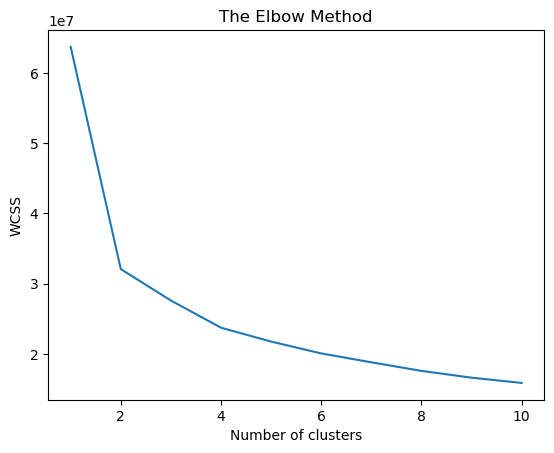

In [8]:
# Using the elbow method to find the optimal number of clusters



from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter=800)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)#Thus is the WCSS of the trained clustering mdoel
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')#Within Cluster sum of square
plt.show()

## Finding optimal number of clusters using Elbow Method: 2

# 2. بواسطة طريقة KElbowVisualizer 

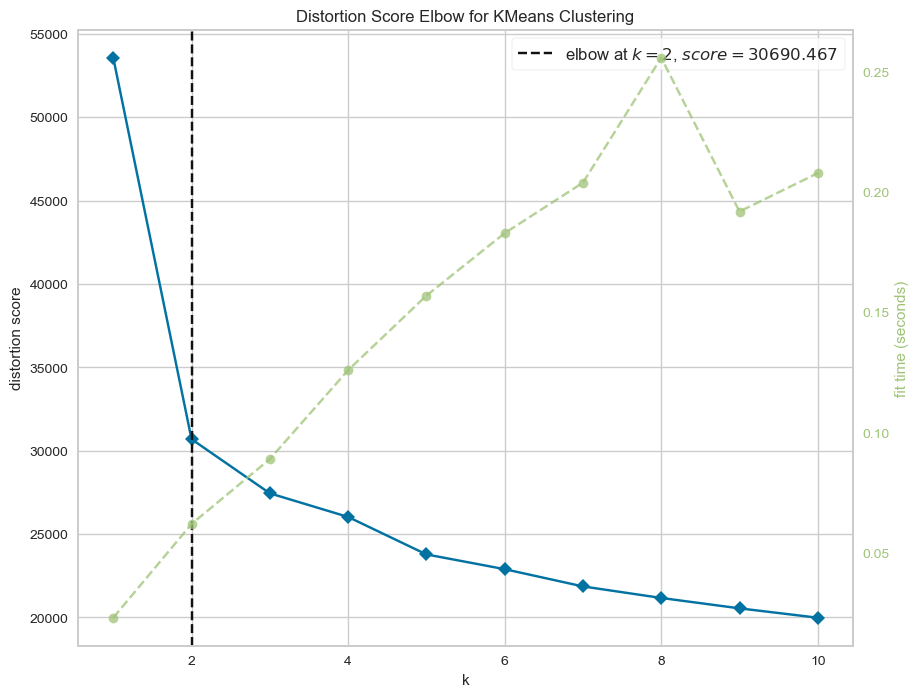

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:

# Elbow Method On X Data

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(X)
visualizer.poof()

## Finding optimal number of clusters using Elbow Method: 2


# 3. بواسطة طريقة Silhouette Score 


## Finding optimal number of clusters using Silhouette Score:
Higher values are better. Values range from -1 to 1.

    
### <u>Silhouette Score using X Data</u>:

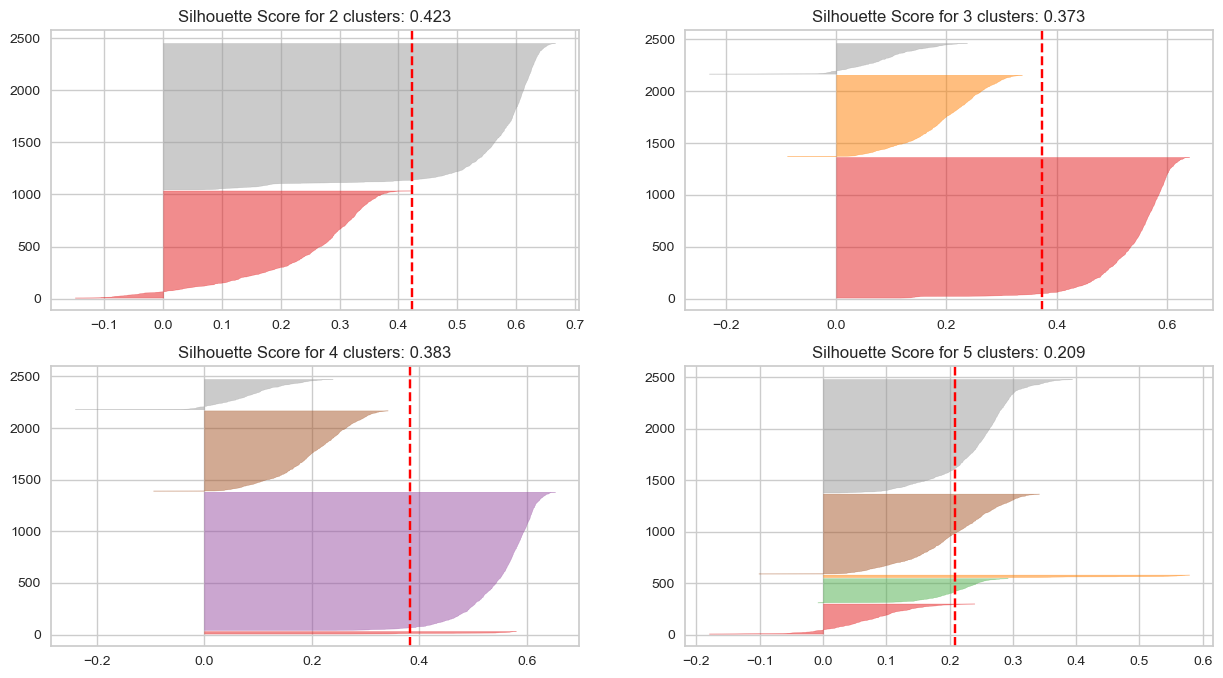

In [10]:
# Silhouette Scores of  Data
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(X)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(X, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)
#   silViz.poof()

## Finding optimal number of clusters using Silhouette Score Method: 2


## أيجاد قيم التنبؤ لكل طريقة من طرق CLUSTRING

In [11]:
#1 KMeans Clustering >> k=2 i.e. either Malignant or Benign

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)



In [12]:
#2 Hierarchical Agglomerative Clustering 

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(X)


In [13]:
#3 DBSCAN (Density-Based Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2, min_samples=6)
dbs_pred = dbs.fit_predict(X)


In [14]:
#4 MeanShift Clustering

from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_pred = ms.fit_predict(X)



In [15]:
#5 Spectral Clustering

from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2, gamma=1.0, affinity="rbf", assign_labels="discretize")
sc_pred = sc.fit_predict(X)


In [16]:
#6 Gaussian Mixture with Expectation Maximization (EM) Clustering
# Uses all specified components to fit.

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, covariance_type="full")
gm_pred = gm.fit_predict(X)


In [17]:
#7 Gaussian Mixture with Variation Inference (VI) Clustering >> Dirichlet process.
# Uses only as much as needed components for a good fit.

from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=2, covariance_type="full")
bgm_pred = bgm.fit_predict(X)


In [18]:
#Write output to excel

FF=pd.DataFrame({'KMeans':km_pred,'Hierarchical':ac_pred,
                'DBSCAN':dbs_pred,'MeanShift':ms_pred,
                'Spectral':sc_pred,'Gaussian Mixture with vi':bgm_pred,'Gaussian Mixture with EM':gm_pred})

FF.to_excel("type_pred_Clustering.xlsx")  

In [19]:
data = pd.DataFrame({ 'KMeans':km_pred,'Hierarchical':ac_pred,
                'DBSCAN':dbs_pred,'MeanShift':ms_pred,
                'Spectral':sc_pred,'Gaussian Mixture with vi':bgm_pred, 'Gaussian Mixture with EM':gm_pred})
data

,KMeans,Hierarchical,DBSCAN,MeanShift,Spectral,Gaussian Mixture with vi,Gaussian Mixture with EM
0,0,1,-1,0,0,1,1
1,0,1,-1,0,0,1,1
2,0,1,-1,0,0,1,1
3,0,1,-1,0,0,1,1
4,0,1,-1,0,0,1,1
...,...,...,...,...,...,...,...
2430,0,1,-1,0,0,1,1
2431,0,1,-1,0,0,1,1
2432,0,1,-1,0,0,1,1
2433,0,1,-1,0,0,1,1
